# Assignment-1 - Data Analysis of Sales of furniture brand based out of the EMEA.

Problem Statement - This is a furniture brand based out of the EMEA that has seen rapid growth in sales in recent quarters and wants to build a data-driven strategy to drive sales further.

Based on the data analysis we would like to know the following:

Exploratory Data Analysis - Sanity checks the makeup of the data. Learn what variables are being captured, why, when, and what they mean to the business. Build a structured view of the available data.

Descriptive Analytics is generating business Insights - Starting to surface top-level business insights. For example How many products are being sold, what seasonality looks like, which products are generating the most revenue, which Geos are home to the most customers(create a heat map of postcodes), and which combination of products is the most popular. This stage builds on the context gathered and the structure created in the Exploratory Data Analysis.

Customer Segmentation.-  Identify different pockets of opportunity within your customer base. Which customers fall into the highest lifetime value category? Perform RFM segmentation. Segmentation will be on a unique identifier in the data please select it based on Exploratory data analysis.

What other analysis, you can suggest driving business impact? 

# Data Cleaning and Exploration

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Importing the dataset
df = pd.read_csv('Assignment round PS.xlsx - Sheet1.csv')

In [3]:
#Exploring the Dataset
df.head()

,Name,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,...,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number
0,#96568,paid,2020-10-12 14:22:07 +0100,unfulfilled,NaN,no,GBP,9.99,0.0,1.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,#96567,paid,2020-10-12 14:17:46 +0100,unfulfilled,NaN,no,GBP,179.99,0.0,30.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#96566,paid,2020-10-12 14:11:13 +0100,unfulfilled,NaN,no,GBP,71.99,0.0,12.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#96566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#96565,paid,2020-10-12 14:05:34 +0100,unfulfilled,NaN,no,GBP,14.99,0.0,2.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(118900, 57)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118900 entries, 0 to 118899
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         118900 non-null  object 
 1   Financial Status             95484 non-null   object 
 2   Paid at                      93972 non-null   object 
 3   Fulfillment Status           95484 non-null   object 
 4   Fulfilled at                 85245 non-null   object 
 5   Accepts Marketing            95484 non-null   object 
 6   Currency                     95484 non-null   object 
 7   Subtotal                     95484 non-null   float64
 8   Shipping                     95484 non-null   float64
 9   Taxes                        95484 non-null   float64
 10  Total                        95484 non-null   float64
 11  Discount Code                62031 non-null   object 
 12  Discount Amount              95484 non-null   float64
 13 

In [6]:
#Checking the null values in dataset
df.isnull().sum()

Name                                0
Financial Status                23416
Paid at                         24928
Fulfillment Status              23416
Fulfilled at                    33655
Accepts Marketing               23416
Currency                        23416
Subtotal                        23416
Shipping                        23416
Taxes                           23416
Total                           23416
Discount Code                   56869
Discount Amount                 23416
Shipping Method                 23416
Created at                          0
Lineitem quantity                   0
Lineitem name                       0
Lineitem price                      0
Lineitem compare at price       21688
Lineitem sku                        0
Lineitem requires shipping          0
Lineitem taxable                    0
Lineitem fulfillment status         0
Billing Zip                     23464
Billing Province               118592
Billing Country                 23417
Shipping Zip

As we can see from the above observation, there is so much null values is present in the dataset. 

In [7]:
#Checking the duplicate values in dataset
df.duplicated().sum()

0

There is no duplicate values present in the dataset.

In [8]:
#Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118900 entries, 0 to 118899
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         118900 non-null  object 
 1   Financial Status             95484 non-null   object 
 2   Paid at                      93972 non-null   object 
 3   Fulfillment Status           95484 non-null   object 
 4   Fulfilled at                 85245 non-null   object 
 5   Accepts Marketing            95484 non-null   object 
 6   Currency                     95484 non-null   object 
 7   Subtotal                     95484 non-null   float64
 8   Shipping                     95484 non-null   float64
 9   Taxes                        95484 non-null   float64
 10  Total                        95484 non-null   float64
 11  Discount Code                62031 non-null   object 
 12  Discount Amount              95484 non-null   float64
 13 

If we explore the dataset we can determine that rows containing null values are the rows of same customer who have a record after purchasing of all items by him. This dataset has made based on particular item purchased by a customer. So, we need to keep this thing in our mind and perform the data cleaning based on that.

In [9]:
#Filling the missing values of some columns using forward fill method
df['Financial Status']=df['Financial Status'].fillna(method='ffill')
df['Paid at']=df['Paid at'].fillna(method='ffill')
df['Fulfillment Status']=df['Fulfillment Status'].fillna(method='ffill')
df['Accepts Marketing']=df['Accepts Marketing'].fillna(method='ffill')
df['Currency']=df['Currency'].fillna(method='ffill')
df['Shipping']=df['Shipping'].fillna(method='ffill')
df['Shipping Method']=df['Shipping Method'].fillna(method='ffill')
df['Shipping Country']=df['Shipping Country'].fillna(method='ffill')
df['Billing Country']=df['Billing Country'].fillna(method='ffill')

In [10]:
#Filling the missing values of some columns by inserting the values
df['Fulfilled at']=df['Fulfilled at'].fillna('No_Date')
df['Taxes']=df['Taxes'].fillna(0)
df['Discount Code']=df['Discount Code'].fillna('No_Code')
df['Discount Amount']=df['Discount Amount'].fillna(0)

In [11]:
df.isnull().sum()

Name                                0
Financial Status                    0
Paid at                             0
Fulfillment Status                  0
Fulfilled at                        0
Accepts Marketing                   0
Currency                            0
Subtotal                        23416
Shipping                            0
Taxes                               0
Total                           23416
Discount Code                       0
Discount Amount                     0
Shipping Method                     0
Created at                          0
Lineitem quantity                   0
Lineitem name                       0
Lineitem price                      0
Lineitem compare at price       21688
Lineitem sku                        0
Lineitem requires shipping          0
Lineitem taxable                    0
Lineitem fulfillment status         0
Billing Zip                     23464
Billing Province               118592
Billing Country                     0
Shipping Zip

Now, when you see the dataset, you will learn that a customer who have purchased multiple items have only one record of sale amount which is summed up of all items purchased by him. So, we need to segregate the amount of each item in their respective record.

In [12]:
#Checking the total sale 
df['Total'].sum()

5621379.920000001

In [13]:
df['Total'].head()

0      9.99
1    179.99
2     71.99
3       NaN
4     14.99
Name: Total, dtype: float64

In [14]:
#For segregation, we need to consider the price of item, discount amount and quantity of item.
df['Total']=(df['Lineitem price']*df['Lineitem quantity'])-df['Discount Amount']

In [15]:
df['Total'].head()

0      9.99
1    179.99
2     22.00
3     49.99
4     14.99
Name: Total, dtype: float64

In [16]:
df['Total'].sum()

5615243.2700000005

From above observation, we see that there is a slight change in total sale. It may be because there were some incorrect values are present in the dataset. So, that values are corrected by cleaning the data.

In the dataset, you can see a column named 'Cancelled at' which means that there are records of some items are present in dataset which is being cancelled by the customer. So, we need to get rid of that records so that we could make our dataset precise.

When we look carefully, we can learn that the records which are cancelled have a value named 'refunded' in 'Financial Status' Column. So, on the basis of this, we need to remove all the records of cancelled items.

In [17]:
df[df['Financial Status']=='refunded'].shape

(3674, 57)

In [18]:
df.drop(df[df['Financial Status']=='refunded'].index,inplace=True)

In [19]:
df.shape

(115226, 57)

All the records having cancelled items have removed.

In [20]:
df.isnull().sum()

Name                                0
Financial Status                    0
Paid at                             0
Fulfillment Status                  0
Fulfilled at                        0
Accepts Marketing                   0
Currency                            0
Subtotal                        22695
Shipping                            0
Taxes                               0
Total                               0
Discount Code                       0
Discount Amount                     0
Shipping Method                     0
Created at                          0
Lineitem quantity                   0
Lineitem name                       0
Lineitem price                      0
Lineitem compare at price       21394
Lineitem sku                        0
Lineitem requires shipping          0
Lineitem taxable                    0
Lineitem fulfillment status         0
Billing Zip                     22732
Billing Province               115019
Billing Country                     0
Shipping Zip

Now, its time to drop all the columns which are unnecessary for analysis or can't be clean.

In [21]:
df.drop([                         
'Financial Status',
'Paid at',                         
'Fulfillment Status',               
'Fulfilled at',                     
'Accepts Marketing',                                  
'Subtotal',                      
'Shipping',                       
'Taxes',                                           
'Discount Code',                       
'Shipping Method',                                                                  
'Lineitem compare at price',     
'Lineitem sku',                     
'Lineitem requires shipping',       
'Lineitem taxable',                
'Lineitem fulfillment status',      
'Billing Zip',                   
'Billing Province',                         
'Shipping Zip',                  
'Shipping Province',                      
'Notes',                        
'Note Attributes',              
'Cancelled at',                 
'Payment Method',                
'Payment Reference',             
'Refunded Amount',             
'Vendor',                          
'Outstanding Balance',          
'Employee',                    
'Location',                     
'Device ID',                    
'Id',                            
'Tags',
'Risk Level',                   
'Source',                       
'Lineitem discount',                
'Tax 1 Name',                    
'Tax 1 Value',                  
'Tax 2 Name',                  
'Tax 2 Value',                 
'Tax 3 Name',                  
'Tax 3 Value',                  
'Tax 4 Name',                   
'Tax 4 Value',                  
'Tax 5 Name',                   
'Tax 5 Value',                  
'Phone',                          
'Receipt Number'],axis=1,inplace=True)

In [22]:
df.shape

(115226, 10)

In [23]:
df.head()

,Name,Currency,Total,Discount Amount,Created at,Lineitem quantity,Lineitem name,Lineitem price,Billing Country,Shipping Country
0,#96568,GBP,9.99,0.00,2020-10-12 14:22:06 +0100,1,Focus1 Foam and Fiber Filter - N/a,9.99,GB,GB
1,#96567,GBP,179.99,0.00,2020-10-12 14:17:44 +0100,1,Focus1 HyperClean Cordless 3-in-1 Vacuum - Lig...,179.99,GB,GB
2,#96566,GBP,22.00,17.99,2020-10-12 14:11:12 +0100,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,GB,GB
3,#96566,GBP,49.99,0.00,2020-10-12 14:11:12 +0100,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,GB,GB
4,#96565,GBP,14.99,0.00,2020-10-12 14:05:33 +0100,1,Focus1 Filter Screen - N/a,14.99,GB,GB


Name - Customer ID,
Currency - Currency of Country,
Total - Sale Amount,
Discount Amount - Discount given on Sale Amount,
Created at -  Date of order,
Lineitem Quantity - Quantity of an item purchased by a customer,
Lineitem Name - Item name,
Lineitem price - Item rate,
Billing Country - Country which it is billed from,
Shipping Country - Country which it is shipped to

In [24]:
#Changing the column names
df.rename(columns = {'Name':'Customer_ID','Total':'Sale_amount','Discount Amount':'Discount_Amount','Created at':'Order_date','Lineitem quantity':'Item_quantity','Lineitem name':'Item_name','Lineitem price':'Item_price','Billing Country':'Billing_Country','Shipping Country':'Shipping_Country'},inplace=True)

In [25]:
df.head()

,Customer_ID,Currency,Sale_amount,Discount_Amount,Order_date,Item_quantity,Item_name,Item_price,Billing_Country,Shipping_Country
0,#96568,GBP,9.99,0.00,2020-10-12 14:22:06 +0100,1,Focus1 Foam and Fiber Filter - N/a,9.99,GB,GB
1,#96567,GBP,179.99,0.00,2020-10-12 14:17:44 +0100,1,Focus1 HyperClean Cordless 3-in-1 Vacuum - Lig...,179.99,GB,GB
2,#96566,GBP,22.00,17.99,2020-10-12 14:11:12 +0100,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,GB,GB
3,#96566,GBP,49.99,0.00,2020-10-12 14:11:12 +0100,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,GB,GB
4,#96565,GBP,14.99,0.00,2020-10-12 14:05:33 +0100,1,Focus1 Filter Screen - N/a,14.99,GB,GB


In [26]:
df.isnull().sum()

Customer_ID         0
Currency            0
Sale_amount         0
Discount_Amount     0
Order_date          0
Item_quantity       0
Item_name           0
Item_price          0
Billing_Country     0
Shipping_Country    0
dtype: int64

Now, our data is cleaned and structured.

In [27]:
#Exploring the dataset and take some insights
df.describe()


,Sale_amount,Discount_Amount,Item_quantity,Item_price
count,115226.000000,115226.000000,115226.000000,115226.000000
mean,46.816251,8.246810,1.024647,54.388019
std,54.110773,14.956004,0.256958,59.189311
min,-951.440000,0.000000,1.000000,0.000000
25%,19.990000,0.000000,1.000000,24.990000
50%,29.990000,3.990000,1.000000,34.990000
75%,56.000000,10.490000,1.000000,69.990000
max,1799.970000,973.430000,37.000000,999.990000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115226 entries, 0 to 118898
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       115226 non-null  object 
 1   Currency          115226 non-null  object 
 2   Sale_amount       115226 non-null  float64
 3   Discount_Amount   115226 non-null  float64
 4   Order_date        115226 non-null  object 
 5   Item_quantity     115226 non-null  int64  
 6   Item_name         115226 non-null  object 
 7   Item_price        115226 non-null  float64
 8   Billing_Country   115226 non-null  object 
 9   Shipping_Country  115226 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 9.7+ MB


In [29]:
df['Sale_amount'].sum()

5394449.36

This is a total sales amount made by company.

In [30]:
df['Currency'].unique()

array(['GBP'], dtype=object)

In [31]:
df['Item_name'].nunique()

1304

In [32]:
df['Item_quantity'].sum()

118066

That much items has been sold by company. 

Now, Our data is structured and cleaned. we need to start the descriptive analysis based on that dataset and answer some questions.

# Descriptive Analysis

## Q.1 How many products are being sold ?

In [33]:
df['Item_quantity'].sum()

118066

Observation - There are total of 118066 products have been sold.

## Q.2 What seasonality looks like ?

In [34]:
df['Order_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 115226 entries, 0 to 118898
Series name: Order_date
Non-Null Count   Dtype 
--------------   ----- 
115226 non-null  object
dtypes: object(1)
memory usage: 1.8+ MB


In [35]:
df['Order_date'].unique()

array(['2020-10-12 14:22:06 +0100', '2020-10-12 14:17:44 +0100',
       '2020-10-12 14:11:12 +0100', ..., '2016-03-29 23:06:57 +0100',
       '2016-03-29 20:16:08 +0100', '2016-03-29 15:10:10 +0100'],
      dtype=object)

In [36]:
df['Date']=df['Order_date'].str.split(' ').str[0]
df['Time']=df['Order_date'].str.split(' ').str[1]
df['No']=df['Order_date'].str.split(' ').str[2]

In [37]:
df.head()

,Customer_ID,Currency,Sale_amount,Discount_Amount,Order_date,Item_quantity,Item_name,Item_price,Billing_Country,Shipping_Country,Date,Time,No
0,#96568,GBP,9.99,0.00,2020-10-12 14:22:06 +0100,1,Focus1 Foam and Fiber Filter - N/a,9.99,GB,GB,2020-10-12,14:22:06,+0100
1,#96567,GBP,179.99,0.00,2020-10-12 14:17:44 +0100,1,Focus1 HyperClean Cordless 3-in-1 Vacuum - Lig...,179.99,GB,GB,2020-10-12,14:17:44,+0100
2,#96566,GBP,22.00,17.99,2020-10-12 14:11:12 +0100,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,GB,GB,2020-10-12,14:11:12,+0100
3,#96566,GBP,49.99,0.00,2020-10-12 14:11:12 +0100,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,GB,GB,2020-10-12,14:11:12,+0100
4,#96565,GBP,14.99,0.00,2020-10-12 14:05:33 +0100,1,Focus1 Filter Screen - N/a,14.99,GB,GB,2020-10-12,14:05:33,+0100


In [38]:
df.drop('Order_date',inplace=True,axis=1)

In [39]:
df.head()

,Customer_ID,Currency,Sale_amount,Discount_Amount,Item_quantity,Item_name,Item_price,Billing_Country,Shipping_Country,Date,Time,No
0,#96568,GBP,9.99,0.00,1,Focus1 Foam and Fiber Filter - N/a,9.99,GB,GB,2020-10-12,14:22:06,+0100
1,#96567,GBP,179.99,0.00,1,Focus1 HyperClean Cordless 3-in-1 Vacuum - Lig...,179.99,GB,GB,2020-10-12,14:17:44,+0100
2,#96566,GBP,22.00,17.99,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,GB,GB,2020-10-12,14:11:12,+0100
3,#96566,GBP,49.99,0.00,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,GB,GB,2020-10-12,14:11:12,+0100
4,#96565,GBP,14.99,0.00,1,Focus1 Filter Screen - N/a,14.99,GB,GB,2020-10-12,14:05:33,+0100


In [40]:
#Splitting the date into year, Month, and Day
df['Year']=df['Date'].str.split('-').str[0]
df['Month']=df['Date'].str.split('-').str[1]
df['Day']=df['Date'].str.split('-').str[2]

In [41]:
df.head()

,Customer_ID,Currency,Sale_amount,Discount_Amount,Item_quantity,Item_name,Item_price,Billing_Country,Shipping_Country,Date,Time,No,Year,Month,Day
0,#96568,GBP,9.99,0.00,1,Focus1 Foam and Fiber Filter - N/a,9.99,GB,GB,2020-10-12,14:22:06,+0100,2020,10,12
1,#96567,GBP,179.99,0.00,1,Focus1 HyperClean Cordless 3-in-1 Vacuum - Lig...,179.99,GB,GB,2020-10-12,14:17:44,+0100,2020,10,12
2,#96566,GBP,22.00,17.99,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,GB,GB,2020-10-12,14:11:12,+0100,2020,10,12
3,#96566,GBP,49.99,0.00,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,GB,GB,2020-10-12,14:11:12,+0100,2020,10,12
4,#96565,GBP,14.99,0.00,1,Focus1 Filter Screen - N/a,14.99,GB,GB,2020-10-12,14:05:33,+0100,2020,10,12


In [42]:
df.head()

,Customer_ID,Currency,Sale_amount,Discount_Amount,Item_quantity,Item_name,Item_price,Billing_Country,Shipping_Country,Date,Time,No,Year,Month,Day
0,#96568,GBP,9.99,0.00,1,Focus1 Foam and Fiber Filter - N/a,9.99,GB,GB,2020-10-12,14:22:06,+0100,2020,10,12
1,#96567,GBP,179.99,0.00,1,Focus1 HyperClean Cordless 3-in-1 Vacuum - Lig...,179.99,GB,GB,2020-10-12,14:17:44,+0100,2020,10,12
2,#96566,GBP,22.00,17.99,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,GB,GB,2020-10-12,14:11:12,+0100,2020,10,12
3,#96566,GBP,49.99,0.00,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,GB,GB,2020-10-12,14:11:12,+0100,2020,10,12
4,#96565,GBP,14.99,0.00,1,Focus1 Filter Screen - N/a,14.99,GB,GB,2020-10-12,14:05:33,+0100,2020,10,12


### Year wise

In [43]:
df.groupby(['Year']).sum().reset_index()

,Year,Sale_amount,Discount_Amount,Item_quantity,Item_price
0,2016,136720.19,8608.31,4155,139374.60
1,2017,351836.71,36098.29,10106,376501.67
2,2018,314309.63,40740.04,8719,347929.55
3,2019,1093121.23,179790.59,19745,1258190.22
4,2020,3498461.60,685009.72,75341,4144917.81


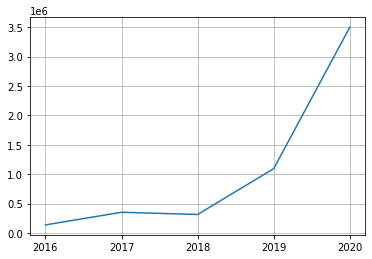

In [44]:
# plotting the line graph
plt.plot(df.groupby(['Year']).sum().reset_index()['Year'],df.groupby(['Year']).sum().reset_index()['Sale_amount'])
plt.xticks(df.groupby(['Year']).sum().reset_index()['Year'])
plt.grid()
plt.show()

Observation - From the above graph, we can conclude that there is a rapid growth in sales from 2019 to 2020. 

### In 2016 

In [45]:
df1=df[df['Year']=='2016']

In [46]:
df1.groupby('Month').sum().reset_index()

,Month,Sale_amount,Discount_Amount,Item_quantity,Item_price
0,03,444.48,0.00,32,389.66
1,04,6253.71,2154.31,287,8023.31
2,05,9653.31,99.98,372,9373.57
3,06,10873.82,41.73,341,10300.97
4,07,10915.05,71.86,402,10617.22
5,08,19225.23,591.19,558,18576.92
6,09,17335.85,438.96,517,16127.61
7,10,14141.10,160.53,423,13830.45
8,11,17997.56,363.27,503,18051.04
9,12,29880.08,4686.48,720,34083.85


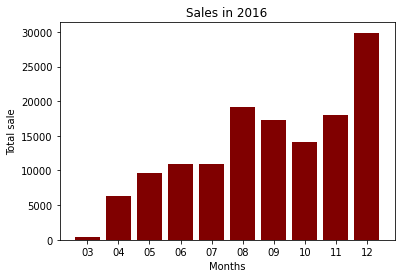

In [47]:
#plotting a bar chart
plt.bar(df1.groupby('Month').sum().reset_index()['Month'],df1.groupby('Month').sum().reset_index()['Sale_amount'],color='maroon')
plt.xlabel('Months')
plt.ylabel('Total sale')
plt.title('Sales in 2016')
plt.show()

### In 2017 

In [48]:
df2=df[df['Year']=='2017']

In [49]:
df2.groupby('Month').sum().reset_index()

,Month,Sale_amount,Discount_Amount,Item_quantity,Item_price
0,01,50818.11,13766.87,1323,63359.34
1,02,14305.58,55.96,439,14036.75
2,03,34764.32,667.40,955,34876.27
3,04,23861.14,259.62,749,23629.17
4,05,37279.94,5482.88,1112,41167.20
5,06,29687.80,548.03,803,28916.34
6,07,19775.23,503.94,576,20039.30
7,08,22765.67,454.93,619,22255.71
8,09,23847.84,929.02,699,24282.19
9,10,23702.18,1801.34,716,24966.95


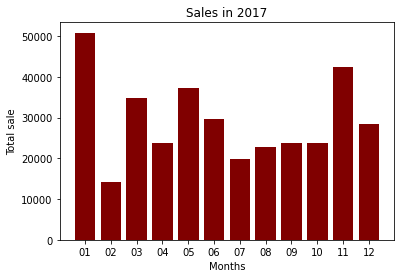

In [50]:
plt.bar(df2.groupby('Month').sum().reset_index()['Month'],df2.groupby('Month').sum().reset_index()['Sale_amount'],color='maroon')
plt.xlabel('Months')
plt.ylabel('Total sale')
plt.title('Sales in 2017')
plt.show()

### In 2018 

In [51]:
df3=df[df['Year']=='2018']

In [52]:
df3.groupby('Month').sum().reset_index()

,Month,Sale_amount,Discount_Amount,Item_quantity,Item_price
0,01,44970.72,10416.60,1320,54502.75
1,02,13422.16,167.33,451,13314.71
2,03,20056.55,958.34,511,20120.10
3,04,29891.74,5255.83,846,34697.83
4,05,20537.84,170.37,479,20043.61
5,06,16605.96,417.28,472,16458.47
6,07,22064.06,2142.89,647,23522.25
7,08,18817.44,960.93,485,19513.55
8,09,23003.29,4011.95,672,26535.04
9,10,25337.74,3071.10,706,27934.46


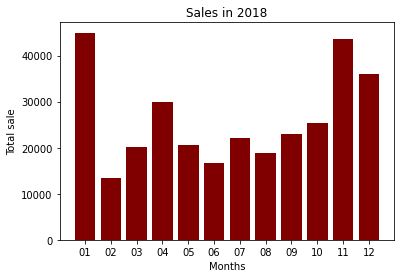

In [53]:
plt.bar(df3.groupby('Month').sum().reset_index()['Month'],df3.groupby('Month').sum().reset_index()['Sale_amount'],color='maroon')
plt.xlabel('Months')
plt.ylabel('Total sale')
plt.title('Sales in 2018')
plt.show()

### In 2019 

In [54]:
df4=df[df['Year']=='2019']

In [55]:
df4.groupby('Month').sum().reset_index()

,Month,Sale_amount,Discount_Amount,Item_quantity,Item_price
0,01,47000.88,10398.83,1346,56627.97
1,02,36748.78,4027.76,782,39611.92
2,03,48904.82,5391.62,1116,53031.62
3,04,54216.53,5475.07,988,58706.42
4,05,47771.51,4042.96,876,51449.71
5,06,44201.63,4406.89,668,48060.15
6,07,91151.62,13678.64,1476,103094.58
7,08,67163.83,9744.69,1000,76560.68
8,09,83887.52,10030.96,1470,93028.91
9,10,141812.81,17720.04,2395,157722.52


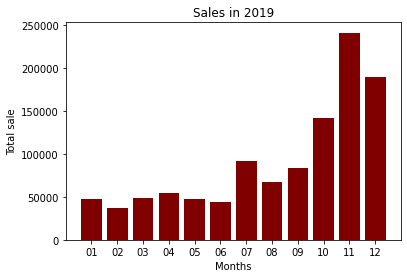

In [56]:
plt.bar(df4.groupby('Month').sum().reset_index()['Month'],df4.groupby('Month').sum().reset_index()['Sale_amount'],color='maroon')
plt.xlabel('Months')
plt.ylabel('Total sale')
plt.title('Sales in 2019')
plt.show()

### In 2020 

In [57]:
df5=df[df['Year']=='2020']

In [58]:
df5.groupby('Month').sum().reset_index()

,Month,Sale_amount,Discount_Amount,Item_quantity,Item_price
0,01,176029.57,38174.00,3486,212802.22
1,02,162575.98,31341.59,3551,191874.21
2,03,280770.20,53447.69,6097,332403.68
3,04,415635.57,82612.39,8539,495478.85
4,05,517090.21,98857.28,10503,610261.92
5,06,470210.58,96307.97,9566,558198.94
6,07,445038.55,95307.16,9913,535615.47
7,08,475173.71,77402.68,10303,545347.73
8,09,381919.52,76702.51,8999,455901.06
9,10,174017.71,34856.45,4384,207033.73


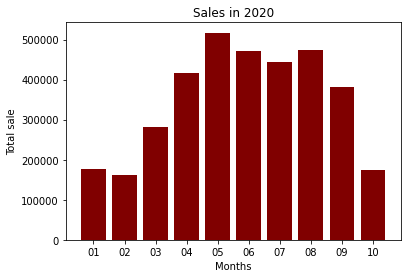

In [59]:
plt.bar(df5.groupby('Month').sum().reset_index()['Month'],df5.groupby('Month').sum().reset_index()['Sale_amount'],color='maroon')
plt.xlabel('Months')
plt.ylabel('Total sale')
plt.title('Sales in 2020')
plt.show()

Observation - from the above observations, we can say that november,december and january are the best months for sales.

## Q.3 Which products are generating the most revenue ?

In [60]:
data=df.groupby(['Item_name']).sum().reset_index().sort_values('Sale_amount',ascending=False).head(5)

([<matplotlib.patches.Wedge at 0x242bced5520>,
 [Text(0.4275695842473884, 1.0135009869884268, 'Focus1 HyperClean Cordless 3-in-1 Vacuum - Light Blue - SC15820N'),
  Text(-1.0991120154196037, 0.0441902428173577, 'Focus1 PowerPlush Turbo Cordless 3-in-1 Vacuum - Dark Blue - SC15822N'),
  Text(-0.3348446779689453, -1.0477972330732095, 'Focus1 HyperClean Cordless 3-in-1 Vacuum - Light Blue'),
  Text(0.5958886911817584, -0.9246170384119532, 'Focus1 Handheld Garment Steamer - Purple - SI12020N'),
  Text(1.0406576556216443, -0.35641498817538997, 'Focus1 Portable Garment Steamer - Grey')],
 [Text(0.2332197732258482, 0.5528187201755055, '37.29%'),
  Text(-0.5995156447743292, 0.024103768809467834, '24.14%'),
  Text(-0.1826425516194247, -0.5715257634944778, '17.30%'),
  Text(0.32503019519004994, -0.5043365664065198, '10.77%'),
  Text(0.5676314485208969, -0.1944081753683945, '10.50%')])

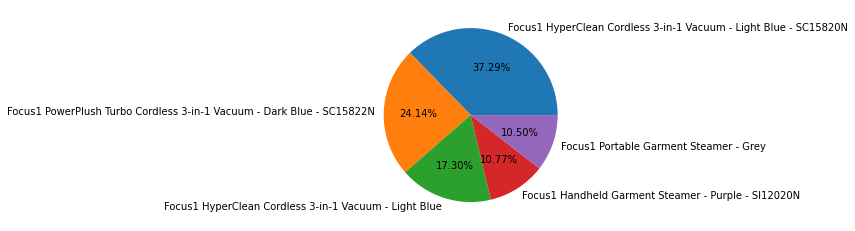

In [61]:
plt.pie(data['Sale_amount'],labels=data['Item_name'],autopct='%1.2f%%')

Observation- Above is the top 5 items which have a most revenue.

## Q.4 Which Geos are home to the most customers (create a heat map of postcodes) ?

In [62]:
df.groupby(['Billing_Country']).count().reset_index().sort_values('Customer_ID',ascending=False).head(5)

,Billing_Country,Customer_ID,Currency,Sale_amount,Discount_Amount,Item_quantity,Item_name,Item_price,Shipping_Country,Date,Time,No,Year,Month,Day
12,GB,114773,114773,114773,114773,114773,114773,114773,114773,114773,114773,114773,114773,114773,114773
17,IE,179,179,179,179,179,179,179,179,179,179,179,179,179,179
42,US,55,55,55,55,55,55,55,55,55,55,55,55,55,55
19,IM,28,28,28,28,28,28,28,28,28,28,28,28,28,28
15,HK,17,17,17,17,17,17,17,17,17,17,17,17,17,17


Observation - from the above records, this is a top 5 countries which is a home for most customers.

In [63]:
data2=df.groupby(['Billing_Country']).count()

In [64]:
data2.head()

,Customer_ID,Currency,Sale_amount,Discount_Amount,Item_quantity,Item_name,Item_price,Shipping_Country,Date,Time,No,Year,Month,Day
Billing_Country,,,,,,,,,,,,,,
AE,3,3,3,3,3,3,3,3,3,3,3,3,3,3
AU,14,14,14,14,14,14,14,14,14,14,14,14,14,14
BE,4,4,4,4,4,4,4,4,4,4,4,4,4,4
BG,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BH,1,1,1,1,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:ylabel='Billing_Country'>

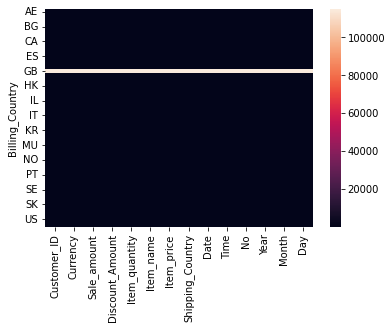

In [65]:
# creating the heatmap
sns.heatmap(data2)

## Q.5 Which combination of products is the most popular ?

In [66]:
# removing the non duplicated customer ids
data3 = df[df['Customer_ID'].duplicated(keep=False)]

In [67]:
data3.head(20)

,Customer_ID,Currency,Sale_amount,Discount_Amount,Item_quantity,Item_name,Item_price,Billing_Country,Shipping_Country,Date,Time,No,Year,Month,Day
2,#96566,GBP,22.00,17.99,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,GB,GB,2020-10-12,14:11:12,+0100,2020,10,12
3,#96566,GBP,49.99,0.00,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,GB,GB,2020-10-12,14:11:12,+0100,2020,10,12
6,#96563,GBP,46.00,23.99,1,Focus1 Retro 45L Square Sensor Bin - Cream,69.99,GB,GB,2020-10-12,13:55:47,+0100,2020,10,12
7,#96563,GBP,49.99,0.00,1,Focus1 1.5l Jug Kettle - Cream,49.99,GB,GB,2020-10-12,13:55:47,+0100,2020,10,12
16,#96554,GBP,6.00,23.99,1,Focus1 Nordic Oval Bread Bin with Cutting Boar...,29.99,GB,GB,2020-10-12,13:40:08,+0100,2020,10,12
17,#96554,GBP,39.99,0.00,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,GB,GB,2020-10-12,13:40:08,+0100,2020,10,12
18,#96554,GBP,49.99,0.00,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,GB,GB,2020-10-12,13:40:08,+0100,2020,10,12
19,#96553,GBP,-4.00,28.99,1,Focus1 Nordic Set of 3 Storage Canisters - Sla...,24.99,GB,GB,2020-10-12,13:39:44,+0100,2020,10,12
20,#96553,GBP,49.99,0.00,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,GB,GB,2020-10-12,13:39:44,+0100,2020,10,12
21,#96553,GBP,39.99,0.00,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,GB,GB,2020-10-12,13:39:44,+0100,2020,10,12


In [68]:
# Grouping the items as per the customer
data3['Grouped']=data3.groupby('Customer_ID')['Item_name'].transform(lambda x: ','.join(x))

In [69]:
data3.head()

,Customer_ID,Currency,Sale_amount,Discount_Amount,Item_quantity,Item_name,Item_price,Billing_Country,Shipping_Country,Date,Time,No,Year,Month,Day,Grouped
2,#96566,GBP,22.00,17.99,1,Focus1 2 Slice Nordic Style Toaster - Slate Grey,39.99,GB,GB,2020-10-12,14:11:12,+0100,2020,10,12,Focus1 2 Slice Nordic Style Toaster - Slate Gr...
3,#96566,GBP,49.99,0.00,1,Focus1 1.7L Nordic Style Cordless Kettle - Sla...,49.99,GB,GB,2020-10-12,14:11:12,+0100,2020,10,12,Focus1 2 Slice Nordic Style Toaster - Slate Gr...
6,#96563,GBP,46.00,23.99,1,Focus1 Retro 45L Square Sensor Bin - Cream,69.99,GB,GB,2020-10-12,13:55:47,+0100,2020,10,12,"Focus1 Retro 45L Square Sensor Bin - Cream,Foc..."
7,#96563,GBP,49.99,0.00,1,Focus1 1.5l Jug Kettle - Cream,49.99,GB,GB,2020-10-12,13:55:47,+0100,2020,10,12,"Focus1 Retro 45L Square Sensor Bin - Cream,Foc..."
16,#96554,GBP,6.00,23.99,1,Focus1 Nordic Oval Bread Bin with Cutting Boar...,29.99,GB,GB,2020-10-12,13:40:08,+0100,2020,10,12,Focus1 Nordic Oval Bread Bin with Cutting Boar...


In [70]:
#removing the duplicate customer id
data3=data3[['Customer_ID','Grouped']].drop_duplicates()

In [71]:
data3

,Customer_ID,Grouped
2,#96566,Focus1 2 Slice Nordic Style Toaster - Slate Gr...
6,#96563,"Focus1 Retro 45L Square Sensor Bin - Cream,Foc..."
16,#96554,Focus1 Nordic Oval Bread Bin with Cutting Boar...
19,#96553,Focus1 Nordic Set of 3 Storage Canisters - Sla...
32,#96543,"Focus1 PowerPlush Floor Head - N/a,Focus1 Hype..."
...,...,...
118801,#1177,Focus1 Anti Calc Cartridge - None - SI9030N001...
118817,#1162,Focus1 1.7 Litre Pyramid Kettle - Cream - SK34...
118832,#1148,Focus1 Anti Calc Cartridge - None - SI9030N001...
118847,#1134,Focus1 500ml of Limescale Remover - None - SA1...


In [72]:
data3.groupby('Grouped').count().sort_values('Customer_ID',ascending=False).head(5)

,Customer_ID
Grouped,
"Focus1 Dirtmaster Carpet Washing Solution - 1 Litre,Focus1 Dirtmaster Carpet Washer - Black",265
"Focus1 Dirtmaster Carpet Washing Solution - 1 Litre,Focus1 Dirtmaster Pro Carpet Washer - Black",242
"Focus1 4 Slice Nordic Style Toaster - Slate Grey - ST14620GRYN,Focus1 1.7L Nordic Style Cordless Kettle - Slate Grey - SK14610GRYN",132
"Focus1 500ml of Limescale Remover - None - SA100,Focus1 Anti Calc Cartridge - None - SI11010N001",114
"Focus1 2 Slice Nordic Style Toaster - Slate Grey - ST14610GRYN,Focus1 1.7L Nordic Style Cordless Kettle - Slate Grey - SK14610GRYN",106


Observation - these are the top 5 combination of products which are most popular or sold most oftenly.

# Customer segmentation

## RFM Calculation 

### 1. Recency

Here we are calculating the recency for customers who had made a purchase with company.

In [73]:
#Converting date into datetime format
df['Date']=pd.to_datetime(df['Date'])

In [74]:
df_recency = df.groupby(by='Customer_ID',as_index=False)['Date'].max()
df_recency.columns=['Customer_ID','Purchase_date']
recent_date = df_recency['Purchase_date'].max()
df_recency['Recency'] = df_recency['Purchase_date'].apply(lambda x: (recent_date -x).days)

In [75]:
df_recency.head()

,Customer_ID,Purchase_date,Recency
0,#10000,2017-10-27,1081
1,#10001,2017-10-27,1081
2,#10002,2017-10-27,1081
3,#10003,2017-10-27,1081
4,#10004,2017-10-27,1081


### 2. Frequency 

Here we are calculating the frequency of transaction by a customer.

In [76]:
df_freq = df.groupby(by=['Customer_ID'],as_index=False)['Date'].count()
df_freq.columns = ['Customer_ID','Frequency']
df_freq.head()

,Customer_ID,Frequency
0,#10000,1
1,#10001,1
2,#10002,1
3,#10003,1
4,#10004,1


### 3. Monetary value 

Here we are calculating the monetary value of customer spend on purchasing products from the company.

In [77]:
df['Total']=df['Sale_amount']*df['Item_quantity']
monetary_df = df.groupby(by='Customer_ID',as_index=False)['Total'].sum()
monetary_df.columns = ['Customer_ID','Monetary']
monetary_df.head()

,Customer_ID,Monetary
0,#10000,14.99
1,#10001,89.99
2,#10002,14.99
3,#10003,14.99
4,#10004,69.99


### Ranking Customers based on their recency,frequency and monetary values. 

we need to normalizing the rank of the customers within a company to analyze the ranking.

In [78]:
rf_df = df_recency.merge(df_freq, on='Customer_ID')
rfm_df = rf_df.merge(monetary_df, on='Customer_ID').drop(columns='Purchase_date')
rfm_df.head()

,Customer_ID,Recency,Frequency,Monetary
0,#10000,1081,1,14.99
1,#10001,1081,1,89.99
2,#10002,1081,1,14.99
3,#10003,1081,1,14.99
4,#10004,1081,1,69.99


In [79]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

#normalizing the rank of the customers
rfm_df['R_rank_norm']=(rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm']=(rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm']=(rfm_df['M_rank']/rfm_df['M_rank'].max())*100

rfm_df.head()

,Customer_ID,Recency,Frequency,Monetary,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,#10000,1081,1,14.99,8528.0,39211.5,7391.0,9.22714,42.376609,7.987593
1,#10001,1081,1,89.99,8528.0,39211.5,75246.5,9.22714,42.376609,81.320314
2,#10002,1081,1,14.99,8528.0,39211.5,7391.0,9.22714,42.376609,7.987593
3,#10003,1081,1,14.99,8528.0,39211.5,7391.0,9.22714,42.376609,7.987593
4,#10004,1081,1,69.99,8528.0,39211.5,67501.5,9.22714,42.376609,72.950146


In [80]:
rfm_df.drop(columns=['R_rank','F_rank','M_rank'],inplace=True)
rfm_df.head()

,Customer_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,#10000,1081,1,14.99,9.22714,42.376609,7.987593
1,#10001,1081,1,89.99,9.22714,42.376609,81.320314
2,#10002,1081,1,14.99,9.22714,42.376609,7.987593
3,#10003,1081,1,14.99,9.22714,42.376609,7.987593
4,#10004,1081,1,69.99,9.22714,42.376609,72.950146


### Calculating the RFM Score 

RFM score is calculated based upon recency, frequency and monetary value normalize ranks. Based upon this score we divide our customers. here we rate them on a scale of 5. Formula used for calculating

#### RFM score is:
#### 0.15 x Recency + 0.28 x Frequency Score + 0.57 x Monetary score

In [81]:
rfm_df['RFM_score']=0.15*rfm_df['R_rank_norm']+0.28*rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['Customer_ID','RFM_score']].head(7)

,Customer_ID,RFM_score
0,#10000,0.89
1,#10001,2.98
2,#10002,0.89
3,#10003,0.89
4,#10004,2.74
5,#10006,1.28
6,#10007,0.89


In [82]:
rfm_df.sort_values(by='RFM_score',ascending=False).head()

,Customer_ID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_score
91400,#95829,1,8,275.34,99.59,99.94,98.89,4.96
91230,#95673,2,7,296.93,99.17,99.86,99.00,4.96
92049,#96420,0,7,242.35,100.00,99.86,98.65,4.96
91163,#95612,2,7,303.92,99.17,99.86,99.04,4.96
89613,#94186,8,4,649.96,97.45,98.45,99.81,4.95


In [83]:
#Some statistical analysis
rfm_df.describe()

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_score
count,92531.000000,92531.000000,92531.000000,92531.000000,92531.000000,92531.000000,92531.000000
mean,340.332570,1.245269,60.658198,50.058911,50.003974,50.000918,2.500422
std,397.618121,0.716638,102.226105,28.901159,18.033234,28.849842,0.985516
min,0.000000,1.000000,0.000000,0.000000,42.380000,0.010000,0.600000
25%,89.000000,1.000000,23.700000,25.020000,42.380000,25.120000,1.720000
50%,171.000000,1.000000,39.500000,50.040000,42.380000,49.850000,2.440000
75%,378.000000,1.000000,74.365000,74.970000,42.380000,75.000000,3.300000
max,1658.000000,14.000000,12312.860000,100.000000,100.000000,100.000000,4.960000


### Rating Customer based on the RFM score. 

Dividing customer segments based on RFM score.

•	rfm score > 4.5 : Top Customer,
•	4.5 > rfm score > 4 : High Value Customer,
•	4 > rfm score > 3 : Medium value customer,
•	3 > rfm score > 1.6 : Low value customer,
•	Rfm score < 1.6 : Lost Customer

In [84]:
rfm_df['Customer_segment']=np.where(rfm_df['RFM_score']>4.5, "Top customers",(np.where(rfm_df['RFM_score']>4,"High value customer",(np.where(rfm_df['RFM_score']>3,"Medium Value customer",np.where(rfm_df['RFM_score']>1.6,"Low value customer","Lost customers"))))))
rfm_df[['Customer_ID','RFM_score','Customer_segment']].head(20)

,Customer_ID,RFM_score,Customer_segment
0,#10000,0.89,Lost customers
1,#10001,2.98,Low value customer
2,#10002,0.89,Lost customers
3,#10003,0.89,Lost customers
4,#10004,2.74,Low value customer
5,#10006,1.28,Lost customers
6,#10007,0.89,Lost customers
7,#10009,0.89,Lost customers
8,#10010,2.74,Low value customer
9,#10011,2.93,Low value customer


In [85]:
rfm_df['Customer_segment'].value_counts(ascending=False)

Low value customer       43203
Medium Value customer    23580
Lost customers           19402
High value customer       5126
Top customers             1220
Name: Customer_segment, dtype: int64

## Visualizing the customer segments  

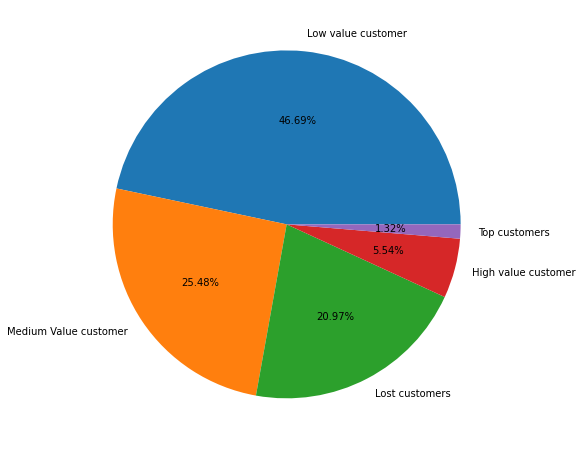

In [86]:
plt.subplots(figsize=(10,8))
plt.pie(rfm_df.Customer_segment.value_counts(),
       labels=rfm_df.Customer_segment.value_counts().index,
       autopct='%1.2f%%')
plt.show()

#### - Above pie chart is defining that - 

1. Maximum customers are Low value customers.
2. Top customers are very less and lost customers are high which is bad thing.

#### Dividing  the customer segments into 3 categories

#### 1. Highest lifetime value customers
#### 2. Medium lifetime value customers
#### 3. lowest lifetime value customers

Lets convert our previous segment into above three :
•	RFM_score > 4 : Highest lifetime value customers
•	4 > RFM_score > 2 : Medium lifetime value customers
•	2 > RFM_score : Lowest lifetime value customers


In [87]:
rfm_df['Customer_segment'] = np.where(rfm_df['RFM_score']>4, "Highest lifetime value customers",(np.where(rfm_df['RFM_score']>2,"Medium lifetime value customers",np.where(rfm_df['RFM_score']<2,"Lowest lifetime value customers","Lowest lifetime value customers"))))
rfm_df[['Customer_ID','RFM_score','Customer_segment']].head(20)

,Customer_ID,RFM_score,Customer_segment
0,#10000,0.89,Lowest lifetime value customers
1,#10001,2.98,Medium lifetime value customers
2,#10002,0.89,Lowest lifetime value customers
3,#10003,0.89,Lowest lifetime value customers
4,#10004,2.74,Medium lifetime value customers
5,#10006,1.28,Lowest lifetime value customers
6,#10007,0.89,Lowest lifetime value customers
7,#10009,0.89,Lowest lifetime value customers
8,#10010,2.74,Medium lifetime value customers
9,#10011,2.93,Medium lifetime value customers


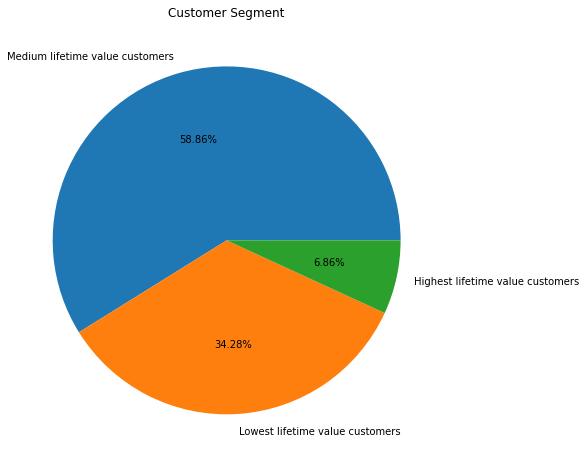

In [88]:
plt.subplots(figsize=(10,8))
plt.pie(rfm_df.Customer_segment.value_counts(),labels=rfm_df.Customer_segment.value_counts().index,autopct='%1.2f%%')
plt.title('Customer Segment')
plt.show()

### Conclusion 

#### Only 6.86% are highest lifetime value customers which means that company needs to focus on getting more customers who will be regular.

### Suggestion : 
#### we can suggest predictive analytics to get the vision more clear toward driving more sales and business impact.